In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [3]:
data.to_csv('Advertising.csv')

In [4]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 4)

In [6]:
# get a visual understanding of it
# visualization package called seaborn
import seaborn as sns
%matplotlib inline

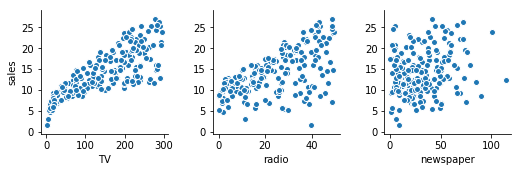

In [7]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales')

In [8]:
#create a python list of feature names
feature_cols=['TV','radio','newspaper']
x=data[feature_cols]
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
y=data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [10]:
# import model from library
from sklearn.linear_model import LinearRegression
# instantiate the model
linreg=LinearRegression()

#fit the model to the training data
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print(linreg.intercept_)
print(linreg.coef_)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [12]:
# transpose np.matrix.transpose(sth)
# inverse of matrix np.linolg.inv(sth)

In [13]:
import numpy as np

In [14]:
xm=np.matrix(x)
ym=np.matrix(y)

In [15]:
xm.shape

(200, 3)

In [16]:
cons=np.ones((200,1))

In [17]:
xm=np.concatenate((cons,xm),axis=1)

In [18]:
xm

matrix([[   1. ,  230.1,   37.8,   69.2],
        [   1. ,   44.5,   39.3,   45.1],
        [   1. ,   17.2,   45.9,   69.3],
        [   1. ,  151.5,   41.3,   58.5],
        [   1. ,  180.8,   10.8,   58.4],
        [   1. ,    8.7,   48.9,   75. ],
        [   1. ,   57.5,   32.8,   23.5],
        [   1. ,  120.2,   19.6,   11.6],
        [   1. ,    8.6,    2.1,    1. ],
        [   1. ,  199.8,    2.6,   21.2],
        [   1. ,   66.1,    5.8,   24.2],
        [   1. ,  214.7,   24. ,    4. ],
        [   1. ,   23.8,   35.1,   65.9],
        [   1. ,   97.5,    7.6,    7.2],
        [   1. ,  204.1,   32.9,   46. ],
        [   1. ,  195.4,   47.7,   52.9],
        [   1. ,   67.8,   36.6,  114. ],
        [   1. ,  281.4,   39.6,   55.8],
        [   1. ,   69.2,   20.5,   18.3],
        [   1. ,  147.3,   23.9,   19.1],
        [   1. ,  218.4,   27.7,   53.4],
        [   1. ,  237.4,    5.1,   23.5],
        [   1. ,   13.2,   15.9,   49.6],
        [   1. ,  228.3,   16.9,  

In [19]:
xmtrans=np.matrix.transpose(xm)

In [20]:
ym.shape

(1, 200)

In [21]:
ym=np.matrix.transpose(ym)

In [22]:
xm.shape

(200, 4)

In [23]:
ym.shape

(200, 1)

In [24]:
A=np.linalg.inv(xmtrans*xm)*xmtrans*ym
print(A)

[[  2.93888937e+00]
 [  4.57646455e-02]
 [  1.88530017e-01]
 [ -1.03749304e-03]]


In [25]:
# splitting our data

from sklearn.cross_validation import train_test_split

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

In [30]:
# import the model
from sklearn.linear_model import LinearRegression

#instantiate your model
linreg=LinearRegression()

#fit the training data to your model
linreg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [33]:
# make predictions for xtest based on the coefficients we got from training data

ypred=linreg.predict(xtest)
ypred

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,
        18.6146359 ,  23.83573998,  16.32488681,  13.43225536,
         9.17173403,  17.333853  ,  14.44479482,   9.83511973,
        17.18797614,  16.73086831,  15.05529391,  15.61434433,
        12.42541574,  17.17716376,  11.08827566,  18.00537501,
         9.28438889,  12.98458458,   8.79950614,  10.42382499,
        11.3846456 ,  14.98082512,   9.78853268,  19.39643187,
        18.18099936,  17.12807566,  21.54670213,  14.69809481,
        16.24641438,  12.32114579,  19.92422501,  15.32498602,
        13.88726522,  10.03162255,  20.93105915,   7.44936831,
         3.64695761,   7.22020178,   5.9962782 ,  18.43381853,
         8.39408045,  14.08371047,  15.02195699,  20.35836418,
        20.57036347,  19.60636679])

In [34]:
# calculate the mean square error
from sklearn import metrics
import numpy as np
metrics.mean_squared_error(ytest,ypred)

1.9730456202283384

In [35]:
np.sqrt(metrics.mean_squared_error(ytest,ypred))

1.4046514230328955

In [36]:
# feature selection or variable selection
# let's drop the newspaper variable

feature_cols=['TV','radio']
x=data[feature_cols]
y=data.sales
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)
np.sqrt(metrics.mean_squared_error(ytest,ypred))

1.3879034699382888

In [37]:
# what if you have a lot of predictors? How can you select the predictors?